In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.rcParams.update({'font.size': 12})
import seaborn as sns
import cmath
import math 
from numpy.linalg import inv
def custom_plot_single(x_lst, y_lst, label_lst, xlim, ylim, label,pltname,
                       color=['k','r','b','g','o','br'],
                       linestyle=['solid','dashed','solid','dashed','solid','dashed'],
                       markertype=[None,None,'o','^','o','^'],
                       fillstyle=['none','none','none','none','full','full'],
                       linewidth=20*[3],
                       markevery=[45,30,50,40,56,72,63,95],
                       show_legend=True,
                       plt_outside=False, y_logscale = False):
    
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    fig.patch.set_facecolor('white')
    ax1.patch.set_facecolor('white')
    for p in range(0, len(x_lst)):
        ax1.plot(x_lst[p], y_lst[p], color[p],
                 linewidth=linewidth[p],
                 linestyle=linestyle[p],
                 marker=markertype[p],
                 fillstyle=fillstyle[p],
                 markevery=markevery[p],
                 markersize=8,
                 label=label_lst[p])
    if(show_legend):
        ax1.legend(prop={'size': 20},loc='best')
    ax1.tick_params(which='minor', width=2, length=4, color='k')
    ax1.tick_params(which='major', width=2, length=8, color='k')

    ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    if(show_legend):
        ax1.legend(prop={'size': 20},loc='best',shadow=True)
    if (y_logscale):
        ax1.set_yscale('log')
    ax1.set_ylim(ylim[0],ylim[1])
    ax1.set_xlim(xlim[0],xlim[1])
    ax1.set_xlabel(label[0], fontsize=25)#, fontdict=dict(weight='bold'))
    ax1.set_ylabel(label[1], fontsize=25)#, fontdict=dict(weight='bold'))
    fontsize=25
    for tick in ax1.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)

    for tick in ax1.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    if(plt_outside==False):
        plt.savefig(pltname, bbox_inches = "tight")
    return plt,pltname


In [3]:
import numpy.polynomial.legendre as GL
def nf(E,kT=0.025,eta=None): 
    """ The Fermi distribution """
    if eta is None:
        # Ensures that numpy does not do anything with complex numbers!
        return 1./( np.exp( E / kT ) + 1 )
    return 1./( np.exp( (E+1j*eta) / kT) + 1)

def maxis(axs, fontsize=12, **kwargs):
    """ Shorthand for setting several parameters for the axis environment """
    if isinstance(axs, (list, np.ndarray)):
        for ax in axs:
            maxis(ax, fontsize=fontsize, **kwargs)
        return
    
    tmp = kwargs.get('xlbl', None)
    if tmp: 
        axs.set_xlabel(tmp, fontsize=fontsize)  # Set font size for x-label
    tmp = kwargs.get('ylbl', None)
    if tmp: 
        axs.set_ylabel(tmp, fontsize=fontsize)  # Set font size for y-label
    tmp = kwargs.get('title', None)
    if tmp: 
        axs.set_title(tmp, fontsize=fontsize)  # Set font size for title
    tmp = kwargs.get('xrng', None)
    if tmp is not None: 
        axs.set_xlim(tmp)
    tmp = kwargs.get('yrng', None)
    if tmp is not None: 
        axs.set_ylim(tmp)
    
    # Set tick parameters
    axs.tick_params(labelsize=fontsize)  # Set font size for ticks



In [4]:

Us=0.0 #V, Source potential
Ud=0.0 #V, Drain potential
Ef=0
mu_s=Ef + Us
mu_d=Ef + Ud 
print('Us, Ud', Us, Ud)
print('Ef, mu_s, mu_d', Ef, mu_s, mu_d)

mu = np.fmin(mu_s, mu_d)
print('mu (min)',mu)

Temp_s = 600
Temp_d = 600
Temp = np.fmin(Temp_s, Temp_d)
print('Temp (min)', Temp)

k=8.617333262e-5 #eV/K
kT = k*Temp
pikT = np.pi*kT

zplus = 1e-8

E_poleMax=3
num_poles=int((E_poleMax-pikT)/(2.0*pikT)+1)

#num_poles=1
print('poles',num_poles)
enclosed_poles = kT * np.pi * (2 * np.arange(num_poles) + 1)
print(enclosed_poles)

Epoles = np.zeros(np.size(enclosed_poles),dtype=complex)
for i in range(0, np.size(enclosed_poles)):
    Epoles[i]  = mu + 1j* enclosed_poles[i]
print(Epoles)

zeta = 2*num_poles*pikT
print('zeta',zeta)

eta = Ef-14*kT
print('eta',eta)

E_left = -10 #eV
E_right=  14*kT
print('E_right',E_right)
E_path4plus_pts = 10
E_path2plus_pts = 10
E_path1plus_pts = 5
E_path0plus_pts = 10
E_total_pts = E_path0plus_pts + E_path1plus_pts + E_path2plus_pts

Us, Ud 0.0 0.0
Ef, mu_s, mu_d 0 0.0 0.0
mu (min) 0.0
Temp (min) 600
poles 9
[0.16243291 0.48729872 0.81216453 1.13703034 1.46189615 1.78676196
 2.11162777 2.43649358 2.76135939]
[0.+0.16243291j 0.+0.48729872j 0.+0.81216453j 0.+1.13703034j
 0.+1.46189615j 0.+1.78676196j 0.+2.11162777j 0.+2.43649358j
 0.+2.76135939j]
zeta 2.9237922938988907
eta -0.723855994008
E_right 0.723855994008


In [5]:
def CircularArc_plus(zeta, eta, E_left, zplus, N=100):
    
    E_center = (E_left**2 - zeta**2 - eta**2)/(2*(E_left - eta))
    
    R = E_center - E_left
    X_lst = []
    Y_lst = []
    
    theta1 = np.arcsin(zeta/R)
    if(E_center > eta):
        theta1 = np.pi-theta1
        
    theta2 = np.pi
    
    for n in range(0,N+1):
        X_lst.append(E_center+R*math.cos(theta1+((theta2-theta1)*n/N)))
        Y_lst.append(zplus+R*math.sin(theta1+((theta2-theta1)*n/N))) 
    X_arr = np.asfarray(X_lst)
    Y_arr = np.asfarray(Y_lst)

    return (X_arr,Y_arr, R, E_center)

circleplus_x, circleplus_y, R_s, Z_s = CircularArc_plus(zeta, eta, E_left,zplus, N=100)

def Path0_plus(zeta,eta,E_right,zplus,deg=11):
    x,w = GL.leggauss(deg) 
    
    t_r = E_right*np.ones(deg)
    t_i = (zeta-zplus)*0.5*x + (zeta+zplus)*0.5
    factor = 1j*(zeta-zplus)*0.5
    return (t_r, t_i, w, factor)

path0plus_x, path0plus_y, path0plus_weight, path0plus_factor = Path0_plus(zeta,eta,E_right,zplus,deg=E_path0plus_pts)


def Path1_plus(zeta,eta,E_right,deg=11):
    x,w = GL.leggauss(deg)     

    t_r = (eta-E_right)*0.5*x + (eta+E_right)*0.5
    t_i = zeta*np.ones(deg)
    factor = (eta-E_right)/2.
    return (t_r, t_i, w, factor)

path1plus_x, path1plus_y, path1plus_weight, path1plus_factor = Path1_plus(zeta,eta,E_right,deg=E_path1plus_pts)


def Path2_plus(zeta, eta, E_left,zplus, deg=41):
    
    E_center = (E_left**2 - zeta**2 - eta**2)/(2*(E_left - eta))
    R = E_center - E_left
    R2 = np.sqrt((eta-E_center)**2 + zeta**2)
    print('E_cent', E_center)
    print('radius, R',R)
    print('radius2, R2',R2)
    
    theta1 = np.arcsin(zeta/R)
    if(E_center > eta):
        theta1 = np.pi-theta1
        
    theta2 = np.pi #2*np.pi-np.arcsin(zeta/R)
    print('theta1:',theta1, R*math.sin(theta1))
    
    # using np.leggauss() method 
    x,w = GL.leggauss(deg) 
    
    a_r=eta
    b_r=E_left
    a_i=zeta
    b_i=zplus
    
    theta = x*(theta2-theta1)/2. + (theta2 + theta1)/2
    t_r = E_center+R*np.cos(theta)
    t_i = zplus+R*np.sin(theta)
    factor = ((theta2-theta1)/2.)*R*np.exp(1j*theta)*1j
    return(E_center, R, t_r, t_i, w, factor)

Eplus_cent, path2_R, path2plus_x, path2plus_y, path2plus_weight, path2plus_factor_arr = Path2_plus(zeta, eta, E_left,zplus,deg=E_path2plus_pts)

def Path4_plus(zplus,E_left,E_right,deg=11):
    x,w = GL.leggauss(deg)     

    t_r = (E_right-E_left)*0.5*x + (E_right+E_left)*0.5
    
    t_i = zplus*np.ones(deg)
    
    factor = (E_right-E_left)*0.5
    return (t_r, t_i, w, factor)

path4plus_x, path4plus_y, path4plus_weight, path4plus_factor = Path4_plus(zplus,E_left,E_right,deg=E_path4plus_pts)


E_cent -4.9011459429338755
radius, R 5.0988540570661245
radius2, R2 5.0988540570661245
theta1: 0.6106760490427213 2.923792293898891


In [6]:
print(path2plus_x[0],path2plus_y[0],zeta,eta)

-0.8226597703105236 3.060108379809769 2.9237922938988907 -0.723855994008


In [7]:

Eplus = np.zeros(E_total_pts,dtype=complex)
weight = np.zeros(E_total_pts,dtype=complex)
factor = np.zeros(E_total_pts,dtype=complex)

for i in range(0, len(path0plus_x)):
    Eplus[i]  = path0plus_x[i] + 1j* path0plus_y[i]
    weight[i]  = path0plus_weight[i]
    factor[i] = path0plus_factor

for i in range(0, len(path1plus_x)):
    Eplus[i+len(path0plus_x)]  = path1plus_x[i] + 1j* path1plus_y[i]
    weight[i+len(path0plus_x)]  = path1plus_weight[i]
    factor[i+len(path0plus_x)]  = path1plus_factor
    
for i in range(0, len(path2plus_x)):
    Eplus[i+len(path0plus_x)+len(path1plus_x)] = path2plus_x[i] + 1j* path2plus_y[i]
    weight[i+len(path0plus_x)+len(path1plus_x)] =  path2plus_weight[i]
    factor[i+len(path0plus_x)+len(path1plus_x)]  = path2plus_factor_arr[i]
#    print(i,factor[i+len(path0plus_x)+len(path1plus_x)] )

Eplus_path4 = np.zeros(E_path4plus_pts,dtype=complex)
weight_path4 = np.zeros(E_path4plus_pts,dtype=complex)
factor_path4 = np.zeros(E_path4plus_pts,dtype=complex)
for i in range(0, E_path4plus_pts):
    Eplus_path4[i]  = path4plus_x[i] + 1j* path4plus_y[i]
    weight_path4[i] = path4plus_weight[i]
    factor_path4[i] = path4plus_factor

f_paths_plus = np.zeros(E_total_pts,dtype=complex)
for i in range(0, E_total_pts): 
    f_paths_plus[i] = nf(Eplus[i].real-mu, eta=Eplus[i].imag, kT=kT)

f_path4_plus = np.zeros(E_path4plus_pts,dtype=complex)
for i in range(0, E_path4plus_pts): 
    f_path4_plus[i] = nf(Eplus_path4[i].real-mu, eta=Eplus_path4[i].imag, kT=kT)
    
#print(f_path1n2)

In [8]:
x_label = np.array([E_left, E_right+0.15, E_right, eta-1.4,  Z_s])
y_label = np.array([zplus, zplus, zeta, zeta,zplus])
labels = np.array([r"$Z_a$", r"$Z_b$", r"$Z_c$", r"$Z_d$", r"$Z_s$"])

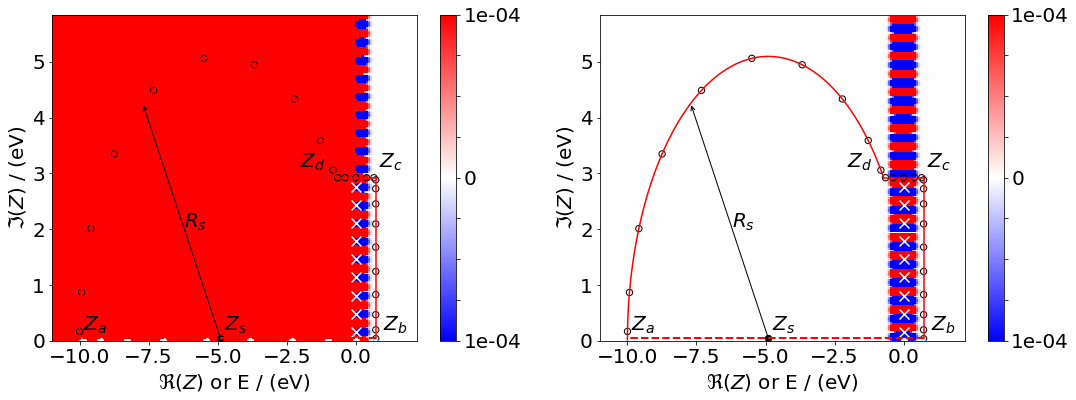

In [9]:
from matplotlib.ticker import LogFormatter, ScalarFormatter

E_contour_pts=200
E_min = E_left-1
E_max = E_right+1.5
E_real=np.linspace(E_min,E_max,E_contour_pts,dtype=float)

E_complex_y_max = 2*zeta
E_complex = np.linspace(-E_complex_y_max, E_complex_y_max, 2*E_contour_pts)

# Calculate the Fermi function
nF = np.empty([len(E_complex), len(E_real)], np.complex128)
for i,e_i in enumerate(E_complex): 
    nF[i,:] = nf(E_real-mu, eta=e_i, kT=kT)
    
fig, axs = plt.subplots(ncols=2, figsize=(18,6))
# Set titles and labels with increased font size

maxis(axs[0], xlbl='$\Re (E)$ [eV]', yrng=[0, np.amax(E_complex)], fontsize=25)  # No title here
maxis(axs[1], xlbl='$\Re (E)$ [eV]', yrng=[0, np.amax(E_complex)], fontsize=25)  # No title here

maxis(axs, xlbl='$\Re (Z)$ or E / (eV)', xrng=[np.amin(E_real), np.amax(E_real)],ylbl='$\Im (Z)$ / (eV)', yrng=[0, np.amax(E_complex)], fontsize=20)
plt.rc('font', size=10)  # Controls default text sizes


L = zeta

for i,data in enumerate([nF.real, nF.imag]):
    p = axs[i].pcolor(E_real, E_complex, data, cmap='bwr', vmin=-0.0001, vmax=0.0001)
    cbar = fig.colorbar(p, ax=axs[i])
    #cbar.set_ticks([-0.0001, -5e-4, 0, 5e-4, 0.0001])  # Set custom ticks if needed    
    # Set the colorbar to use exponential format
    cbar.ax.yaxis.set_major_formatter(ticker.LogFormatter())
    #bar.ax.yaxis.get_major_formatter().set_powerlimits((-4, 4))  
    cbar.ax.tick_params(labelsize=20)

    
    # Upper half plane
    axs[i].scatter(Epoles.real, Epoles.imag, marker="x", color='w', s=100)
    axs[i].plot([E_right, E_left], [zplus+0.05, zplus+0.05], 'r--', lw=2)
    axs[i].plot([E_right, E_right], [zplus+0.05, zeta], 'r')
    axs[i].plot([E_right, eta], [zeta, zeta], 'r')
    axs[i].plot(circleplus_x, circleplus_y, color='r')
    axs[i].scatter(Eplus.real, Eplus.imag, facecolors='none', edgecolors='k', s=40)
    axs[i].scatter(Eplus_path4.real, Eplus_path4.imag, facecolors='w', edgecolors='w', s=40)

    # Lower half plane
    axs[i].scatter(Epoles.real, -Epoles.imag, marker="o", color='aqua', s=100)
    axs[i].plot([E_right, E_left], [-zplus-0.05, -zplus-0.05], 'aqua', linestyle='dashed', lw=2)
    axs[i].plot([E_right, E_right], [-zplus-0.05, -zeta], 'aqua')
    axs[i].plot([E_right, eta], [-zeta, -zeta], 'aqua')
    axs[i].plot(circleplus_x, -circleplus_y, color='aqua')
    axs[i].scatter(Eplus.real, -Eplus.imag, facecolors='none', edgecolors='aqua', s=40)
    
    # Overlay points
    axs[i].scatter(Z_s, zplus+0.05, marker="o", color='black', s=40)
    axs[i].annotate("", xy=(circleplus_x[-40], circleplus_y[-40]), xytext=(Z_s, zplus+0.05),
                    arrowprops=dict(arrowstyle="->", color="black", lw=1))    
    # Calculate the midpoint between (Z_s, zplus) and (Eplus.real, Eplus.imag)
    axs[i].text((Z_s+circleplus_x[-40])/2+0.5, (zplus + circleplus_y[-40])/2, r"$R_s$", fontsize=20, color='black',
                ha='center', va='center')
    # Annotate text
    counter = 0
    for x, y in zip(x_label, y_label):
        label = labels[counter]
        axs[i].annotate(label, (x, y), textcoords="offset points", xytext=(15, 10), ha='center', color='k', fontsize=20)
        counter += 1

plt.savefig("contour_in_complex_plane.png", bbox_inches="tight")

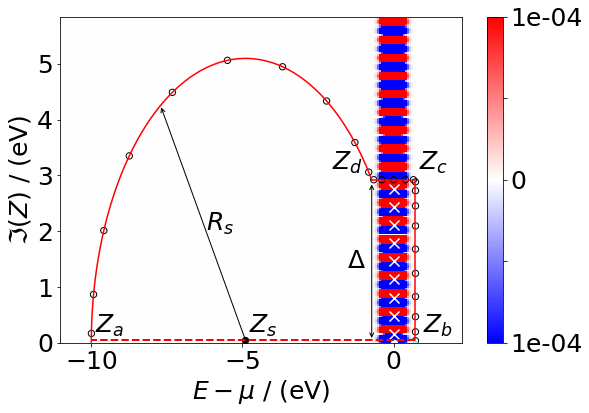

In [19]:
from matplotlib import ticker

# Your existing code to define E_real, E_complex, nF, etc.

fig, axs = plt.subplots(ncols=1, figsize=(9, 6))  # Create a single subplot for the second figure

# Set labels with increased font size, without titles
maxis(axs, xlbl='$E-\mu$ / (eV)', yrng=[0, np.amax(E_complex)], fontsize=25)  # No title here
axs.set_ylabel('$\Im(Z)$ / (eV)', fontsize=25)  # Set y-label directly for clarity

plt.rc('font', size=10)  # Controls default text sizes

L = zeta

data = nF.imag  # Use only the imaginary part for the second figure
p = axs.pcolor(E_real, E_complex, data, cmap='bwr', vmin=-0.0001, vmax=0.0001)
cbar = fig.colorbar(p, ax=axs)

# Set the colorbar to use exponential format
cbar.ax.yaxis.set_major_formatter(ticker.LogFormatter())
cbar.ax.tick_params(labelsize=25)

# Upper half plane
axs.scatter(Epoles.real, Epoles.imag, marker="x", color='w', s=100)
axs.plot([E_right, E_left], [zplus + 0.05, zplus + 0.05], 'r--', lw=2)
axs.plot([E_right, E_right], [zplus + 0.05, zeta], 'r')
axs.plot([E_right, eta], [zeta, zeta], 'r')
axs.plot(circleplus_x, circleplus_y, color='r')
axs.scatter(Eplus.real, Eplus.imag, facecolors='none', edgecolors='k', s=40)
axs.scatter(Eplus_path4.real, Eplus_path4.imag, facecolors='w', edgecolors='w', s=40)

# Lower half plane
axs.scatter(Epoles.real, -Epoles.imag, marker="o", color='aqua', s=100)
axs.plot([E_right, E_left], [-zplus - 0.05, -zplus - 0.05], 'aqua', linestyle='dashed', lw=2)
axs.plot([E_right, E_right], [-zplus - 0.05, -zeta], 'aqua')
axs.plot([E_right, eta], [-zeta, -zeta], 'aqua')
axs.plot(circleplus_x, -circleplus_y, color='aqua')
axs.scatter(Eplus.real, -Eplus.imag, facecolors='none', edgecolors='aqua', s=40)

# Overlay points
axs.scatter(Z_s, zplus + 0.05, marker="o", color='black', s=40)
axs.annotate("", xy=(circleplus_x[-40], circleplus_y[-40]), xytext=(Z_s, zplus + 0.05),
             arrowprops=dict(arrowstyle="->", color="black", lw=1))

axs.text((Z_s + circleplus_x[-40]) / 2 + 0.55, (zplus + circleplus_y[-40]) / 2, r"$R_s$", fontsize=25, color='black',
          ha='center', va='center')

axs.annotate("", xy=(eta, zeta-0.05), xytext=(eta, zplus + 0.05),
             arrowprops=dict(arrowstyle="<->", color="black", lw=1))
axs.text(eta-0.5, zeta / 2, r"$\Delta$", fontsize=25, color='black',
          ha='center', va='center')
# Annotate text
counter = 0
for x, y in zip(x_label, y_label):
    label = labels[counter]
    axs.annotate(label, (x, y), textcoords="offset points", xytext=(18, 10), ha='center', color='k', fontsize=25)
    counter += 1

#axs.annotate(r'$\mu$', xy=(0, -0.02), xytext=(0, -1), fontsize=20, color='black', ha='left', va='center')    
    
plt.savefig("ImagF_Equilibrium.eps", bbox_inches="tight")
